In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [3]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import foldnorm
x = np.linspace(2e-5, 5e0, 5)

noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

In [4]:

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/mse_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surfaces_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surfaces_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surfaces_pred_energy_var.pt").detach().flatten().numpy()

z_test_signed = test_energy-test_pred_energy
z_surface_signed = surface_energy-surface_pred_energy

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

In [5]:
import matplotlib
import random 
import ase.io

In [6]:
# get the indices of the structures that are part of the PIMD set -> if CONVERTED_ID > 999 then it is a PIMD structure:

frames_water_train = ase.io.read("../../Atomistic_experiments/data/H2O/train_frames.xyz", ":" )
frames_water_val = ase.io.read("../../Atomistic_experiments/data/H2O/validation_frames.xyz", ":" )
frames_water_test = ase.io.read("../../Atomistic_experiments/data/H2O/test_frames.xyz", ":" )

ID_test = np.array([int(frame.info["CONVERTED_ID"]) for frame in frames_water_test])
ID_PIMD = ID_test>999
ID_FPS = ID_test<1000

100
95
95
90
0.2399697429379855
0.47704305575651235
95
90
75
70
50
45
20
15


/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_22103/2912288402.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0,0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_22103/2912288402.py:179: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_22103/2912288402.py:245: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[1, 0].plot(x, x, 'r', linestyle

<Figure size 1920x1440 with 0 Axes>

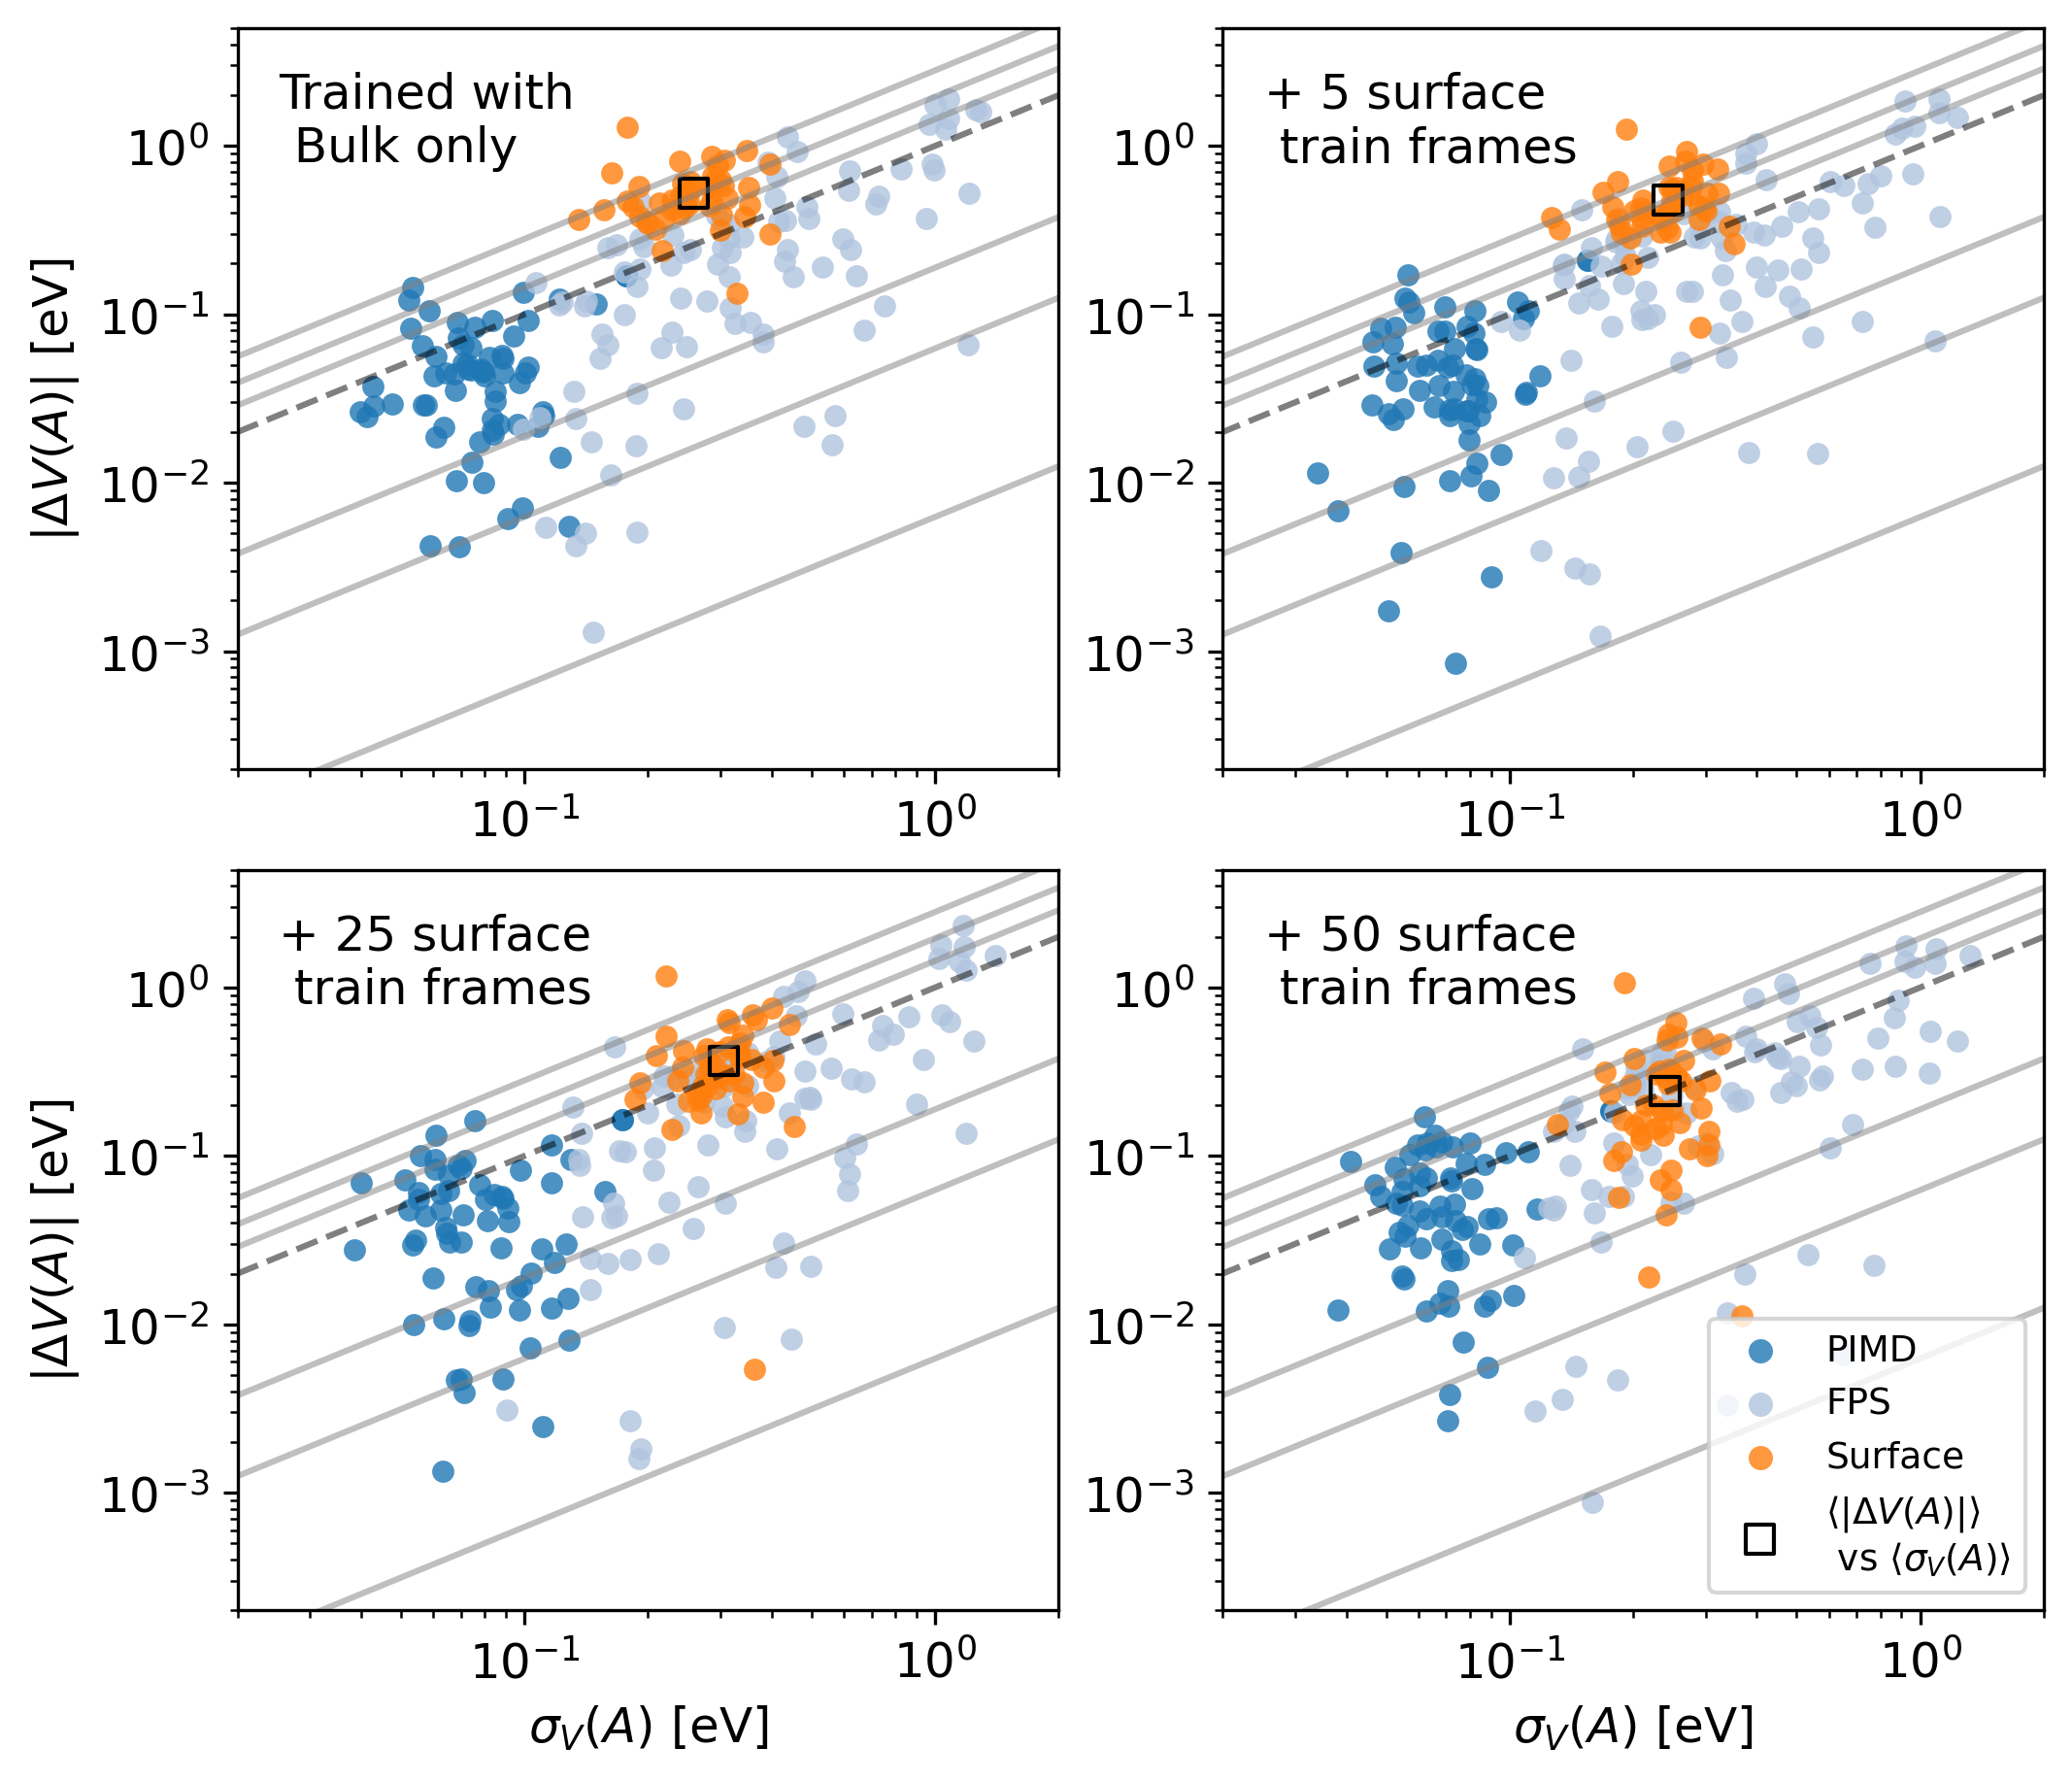

In [24]:
plt.figure(dpi=300)
LINESTYLE_UNIT = "--"
COLOR_UNIT = "black"
SCATTER_SIZE = 30.
OPACITY_SCATTER = 0.8
NLAST = 50
plt.rc('axes', labelsize=13.5)
plt.rcParams.update({'font.size': 9.0})
matplotlib.rc('xtick', labelsize=12.0) 
matplotlib.rc('ytick', labelsize=12.0) 
plt.rc('axes', labelsize=12.)

mean_z = []
mean_sigma = []


fig, axs = plt.subplots(2, 2, figsize=(7, 6),dpi=300,constrained_layout=True,)

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surfaces_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surfaces_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surfaces_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

print(len(surface_energy))
print(np.argmax(z_surface))

mean_sigma.append(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]))
mean_z.append(np.mean(z_surface[-NLAST:]))

"""

axs[1].plot([0., max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
plt.plot([0., -max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
#plt.axhline(y=max_50, color="black")
plt.scatter( z_test_signed, np.sqrt(alpha_2*test_pred_energy_var), label="bulk")
plt.scatter( z_surface_signed, np.sqrt(alpha_2*surface_pred_energy_var), label="surface")
plt.axvline(x=0.0, color="black")
"""

axs[0,0].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_PIMD], z_test[ID_PIMD], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, linewidth=0., color="tab:blue",)
axs[0,0].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_FPS], z_test[ID_FPS], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, linewidth=0., color="lightsteelblue",)
axs[0,0].scatter(np.sqrt(alpha_2*surface_pred_energy_var)[-NLAST:], z_surface[-NLAST:], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, linewidth=0., color="tab:orange",)

axs[0,0].scatter(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]), np.mean(z_surface[-NLAST:]),
               marker="s", color="black", s=50, edgecolors='black', zorder=2, facecolors='none')

axs[0,0].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[0,0].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[0,0].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[0,0].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[0,0].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[0,0].plot(x, quantiles_lower_005, color='gray', alpha=0.5)
axs[0,0].loglog()
axs[0,0].set_xlim(2e-2, 2e0)
axs[0,0].set_ylim(2e-4, 5e0)
axs[0,0].text(0.05, 0.82, 'Trained with\n Bulk only', fontsize=12, transform=axs[0,0].transAxes,)
#axs[0,0].set_xlabel(r"$\sigma_{V}(A)$ [eV]")
axs[0,0].set_ylabel(r"$|\Delta V(A)|$ [eV]")
axs[0,0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens_w_5_surface"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surface_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surface_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surface_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

print(len(surface_energy))
print(np.argmax(z_surface))

print(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:-10]))
print(np.mean(z_surface[-NLAST:]))



mean_sigma.append(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]))
mean_z.append(np.mean(z_surface[-NLAST:]))

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens_w_5_surface"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surface_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surface_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surface_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

print(len(surface_energy))
print(np.argmax(z_surface))

"""

axs[1].plot([0., max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
plt.plot([0., -max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
#plt.axhline(y=max_50, color="black")
plt.scatter( z_test_signed, np.sqrt(alpha_2*test_pred_energy_var), label="bulk")
plt.scatter( z_surface_signed, np.sqrt(alpha_2*surface_pred_energy_var), label="surface")
plt.axvline(x=0.0, color="black")
"""
mean_sigma.append(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]))
mean_z.append(np.mean(z_surface[-NLAST:]))

axs[0, 1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="PIMD", color="tab:blue",)
axs[0, 1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="FPS", color="lightsteelblue", )
axs[0, 1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="Surface", color="tab:orange", )

axs[0, 1].scatter(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]), np.mean(z_surface[-NLAST:]),
               marker="s", color="black", s=50, edgecolors='black', zorder=2, facecolors='none')

axs[0, 1].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_PIMD], z_test[ID_PIMD], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:blue", linewidth=0.)
axs[0, 1].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_FPS], z_test[ID_FPS], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="lightsteelblue", linewidth=0.)
axs[0, 1].scatter(np.sqrt(alpha_2*surface_pred_energy_var)[-NLAST:], z_surface[-NLAST:], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:orange", linewidth=0.)
axs[0, 1].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[0, 1].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[0, 1].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[0, 1].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[0, 1].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[0, 1].plot(x, quantiles_lower_005, color='gray', alpha=0.5)
axs[0, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
axs[0, 1].loglog()
axs[0, 1].set_xlim(2e-2, 2e0)
axs[0, 1].set_ylim(2e-4, 5e0)
axs[0, 1].text(0.05, 0.82, '+ 5 surface\n train frames', fontsize=12, transform=axs[0,1].transAxes,)
#axs[0, 1].set_xlabel(r"$\sigma_{V}(A)$ [eV]")

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens_w_25_surface"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surface_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surface_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surface_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

print(len(surface_energy))
print(np.argmax(z_surface))

"""

axs[1].plot([0., max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
plt.plot([0., -max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
#plt.axhline(y=max_50, color="black")
plt.scatter( z_test_signed, np.sqrt(alpha_2*test_pred_energy_var), label="bulk")
plt.scatter( z_surface_signed, np.sqrt(alpha_2*surface_pred_energy_var), label="surface")
plt.axvline(x=0.0, color="black")
"""

mean_sigma.append(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]))
mean_z.append(np.mean(z_surface[-NLAST:]))

axs[1, 0].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="PIMD", color="tab:blue",)
axs[1, 0].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="FPS", color="lightsteelblue", )
axs[1, 0].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="Surface", color="tab:orange", )

axs[1, 0].scatter(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]), np.mean(z_surface[-NLAST:]),
               marker="s", color="black", s=50, edgecolors='black', zorder=2, facecolors='none')

axs[1, 0].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_PIMD], z_test[ID_PIMD], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:blue", linewidth=0.)
axs[1, 0].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_FPS], z_test[ID_FPS], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="lightsteelblue", linewidth=0.)
axs[1, 0].scatter(np.sqrt(alpha_2*surface_pred_energy_var)[-NLAST:], z_surface[-NLAST:], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:orange", linewidth=0.)
axs[1, 0].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[1, 0].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[1, 0].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[1, 0].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[1, 0].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[1, 0].plot(x, quantiles_lower_005, color='gray', alpha=0.5)
axs[1, 0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
axs[1, 0].loglog()
axs[1, 0].set_xlim(2e-2, 2e0)
axs[1, 0].set_ylim(2e-4, 5e0)
axs[1, 0].text(0.05, 0.82, '+ 25 surface\n train frames', fontsize=12, transform=axs[1,0].transAxes,)
axs[1, 0].set_xlabel(r"$\sigma_{V}(A)$ [eV]")
axs[1,0].set_ylabel(r"$|\Delta V(A)|$ [eV]")
#axs[1].legend()

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens_w_50_surface"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surface_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surface_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surface_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

print(len(surface_energy))
print(np.argmax(z_surface))

mean_sigma.append(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]))
mean_z.append(np.mean(z_surface[-NLAST:]))



axs[1, 1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="PIMD", color="tab:blue",)
axs[1, 1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="FPS", color="lightsteelblue", )
axs[1, 1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="Surface", color="tab:orange", )

axs[1, 1].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_PIMD], z_test[ID_PIMD], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:blue", linewidth=0.)
axs[1, 1].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_FPS], z_test[ID_FPS], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="lightsteelblue", linewidth=0.)
axs[1, 1].scatter(np.sqrt(alpha_2*surface_pred_energy_var)[-NLAST:], z_surface[-NLAST:], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:orange", linewidth=0.)

axs[1, 1].scatter(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]), np.mean(z_surface[-NLAST:]),
               marker="s", color="black", s=50, edgecolors='black', zorder=2, facecolors='none')

axs[1, 1].scatter([],[],
               marker="s", color="black", 
               s=50, edgecolors='black', 
               zorder=2, facecolors='none',
               label=r"$\langle | \Delta V(A)|  \rangle $" + "\n " + r"vs $\langle \sigma_V(A) \rangle $"
               )

axs[1, 1].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[1, 1].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[1, 1].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[1, 1].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[1, 1].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[1, 1].plot(x, quantiles_lower_005, color='gray', alpha=0.5)
axs[1, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
axs[1, 1].loglog()
axs[1, 1].set_xlim(2e-2, 2e0)
axs[1, 1].set_ylim(2e-4, 5e0)
axs[1, 1].text(0.05, 0.82, '+ 50 surface\n train frames', fontsize=12, transform=axs[1,1].transAxes,)
axs[1, 1].set_xlabel(r"$\sigma_{V}(A)$ [eV]")
axs[1, 1].legend()


identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens_w_80_surface"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surface_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surface_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surface_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

print(len(surface_energy))
print(np.argmax(z_surface))

mean_sigma.append(np.mean(np.sqrt(alpha_2 * surface_pred_energy_var)[-NLAST:]))
mean_z.append(np.mean(z_surface[-NLAST:]))



fig.savefig("out-of-distr-active.pdf", dpi=300, bbox_inches="tight")

#plt.ylim(0., 0.8)
#plt.xlim(-1.0, 1.0)
#plt.xlabel("Signed error (eV)")
#plt.ylabel(r"Pred Uncertainty $\sigma$ (eV)")
#plt.legend()

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch 
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import foldnorm
x = np.linspace(2e-5, 5e0, 5)

noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

In [94]:
test_energies = []
test_forces = []
test_pred_energies = []
test_pred_forces = []
test_pred_energy_vars = []

val_energies = []
val_forces = []
val_pred_energies = []
val_pred_forces = []
val_pred_energy_vars = []

surface_energies = []
surface_pred_energies = []
surface_pred_energy_vars = []

z_test = []
z_surface = []

alphas_2 = []

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens"

test_energies.append(torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten())
test_forces.append(torch.load(f'{identifier}/test_forces.pt').detach().numpy())
test_pred_energies.append(torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten())
test_pred_forces.append(torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy())
test_pred_energy_vars.append(torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten())

val_energies.append(torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten())
val_forces.append(torch.load(f'./{identifier}/val_forces.pt').detach())
val_pred_energies.append(torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten())
val_pred_forces.append(torch.load(f'./{identifier}/val_pred_forces.pt').detach())
val_pred_energy_vars.append(torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten())


#surfaces
surface_energies.append(torch.load(f"{identifier}/surfaces_energy.pt").detach().flatten().numpy())
surface_pred_energies.append(torch.load(f"{identifier}/surfaces_pred_energy.pt").detach().flatten().numpy())
#surface_pred_energy_vars.append(torch.load(f"{identifier}/surfaces_pred_energy_var.pt").detach().flatten().numpy())

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()

surface_energy = torch.load(f"{identifier}/surfaces_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surfaces_pred_energy.pt").detach().flatten().numpy()

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()

z_val = np.abs(val_energy-val_pred_energy)
alphas_2.append(np.mean(z_val**2/val_pred_energy_var, axis=0))

#z_surface.append(np.abs(surface_energy-surface_pred_energy))
z_test.append(np.abs(test_energy-test_pred_energy))


surf_pred_var = torch.load(f"{identifier}/surfaces_pred_energy_var.pt").detach().flatten().numpy()


z_surf = np.abs(surface_energy-surface_pred_energy)
z_test.append(np.abs(test_energy-test_pred_energy))

id_outlier = np.argmax(np.abs(surface_energy-surface_pred_energy))


#z_surf = np.delete(z_surf, id_outlier)
#surf_pred_var = np.delete(surf_pred_var, id_outlier)

z_surface.append(z_surf)
surface_pred_energy_vars.append(surf_pred_var)

rmses = []

for N_H2O in [5, 25, 50, 80]:
    identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens_w_{}_surface".format(N_H2O)

    test_energies.append(torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten())
    test_forces.append(torch.load(f'{identifier}/test_forces.pt').detach().numpy())
    test_pred_energies.append(torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten())
    test_pred_forces.append(torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy())
    test_pred_energy_vars.append(torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten())

    val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
    val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
    val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


    z_val = np.abs(val_energy-val_pred_energy)
    alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

    alphas_2.append(alpha_2)

    val_energies.append(torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten())
    val_forces.append(torch.load(f'./{identifier}/val_forces.pt').detach())
    val_pred_energies.append(torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten())
    val_pred_forces.append(torch.load(f'./{identifier}/val_pred_forces.pt').detach())
    val_pred_energy_vars.append(torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten())

    test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
    test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
    surface_energy = torch.load(f"{identifier}/surface_energy.pt").detach().flatten().numpy()
    surface_pred_energy = torch.load(f"{identifier}/surface_pred_energy.pt").detach().flatten().numpy()


    #surfaces
    surface_energies.append(torch.load(f"{identifier}/surface_energy.pt").detach().flatten().numpy())
    surface_pred_energies.append(torch.load(f"{identifier}/surface_pred_energy.pt").detach().flatten().numpy())
    surf_pred_var = torch.load(f"{identifier}/surface_pred_energy_var.pt").detach().flatten().numpy()
    

    z_surf = np.abs(surface_energy-surface_pred_energy)

    rmse = np.sqrt(np.mean((surface_energy-surface_pred_energy)**2))

    z_test.append(np.abs(test_energy-test_pred_energy))

    id_outlier = np.argmax(np.abs(surface_energy-surface_pred_energy))


    #z_surf = np.delete(z_surf, id_outlier)
    #surf_pred_var = np.delete(surf_pred_var, id_outlier)

    z_surface.append(z_surf)
    surface_pred_energy_vars.append(surf_pred_var)


In [32]:
for z_i in z_surface:
    print(z_i.shape)

(100,)
(95,)
(75,)
(50,)
(20,)


In [33]:
torch.load(f"../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens_w_50_surface/surface_pred_energy.pt").detach().flatten().numpy().shape

(50,)

In [34]:
alphas_2

[1.2297922384040496,
 1.058959677121495,
 1.396502083986235,
 1.0905347036460653,
 1.3783716033464817]

In [35]:
len(surface_pred_energy_vars)

5

In [36]:
len(z_surface)

5

In [37]:
surface_pred_energy_vars

[array([0.02024894, 0.05021365, 0.05262188, 0.08006542, 0.08354169,
        0.03220385, 0.09366956, 0.05430163, 0.03381616, 0.07587995,
        0.03576205, 0.08110867, 0.03104309, 0.02738889, 0.0293405 ,
        0.0708654 , 0.0237972 , 0.05275126, 0.08589395, 0.04002076,
        0.02394469, 0.05935642, 0.06213835, 0.07193639, 0.039797  ,
        0.13295381, 0.09706274, 0.03450585, 0.04574688, 0.03846834,
        0.04790113, 0.01666823, 0.02666458, 0.03628321, 0.04943607,
        0.01908616, 0.04343855, 0.04017978, 0.05487997, 0.03406699,
        0.02964694, 0.08144148, 0.06204493, 0.06006957, 0.05991274,
        0.05894825, 0.03510094, 0.05447043, 0.03892467, 0.03336027,
        0.02169206, 0.0524056 , 0.04890173, 0.0982986 , 0.01493545,
        0.0257215 , 0.02755373, 0.04906519, 0.03184895, 0.06667228,
        0.05140586, 0.08789985, 0.02923092, 0.04228348, 0.04632311,
        0.07330988, 0.0766859 , 0.04234465, 0.04646788, 0.05263695,
        0.04672204, 0.03513533, 0.06620657, 0.01

In [38]:
len(surface_pred_energy_vars)

5

In [39]:
range(len(z_surface))

range(0, 5)

In [141]:
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_20921/4085954287.py:61: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(mean_uq[i],
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_20921/4085954287.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)


[]

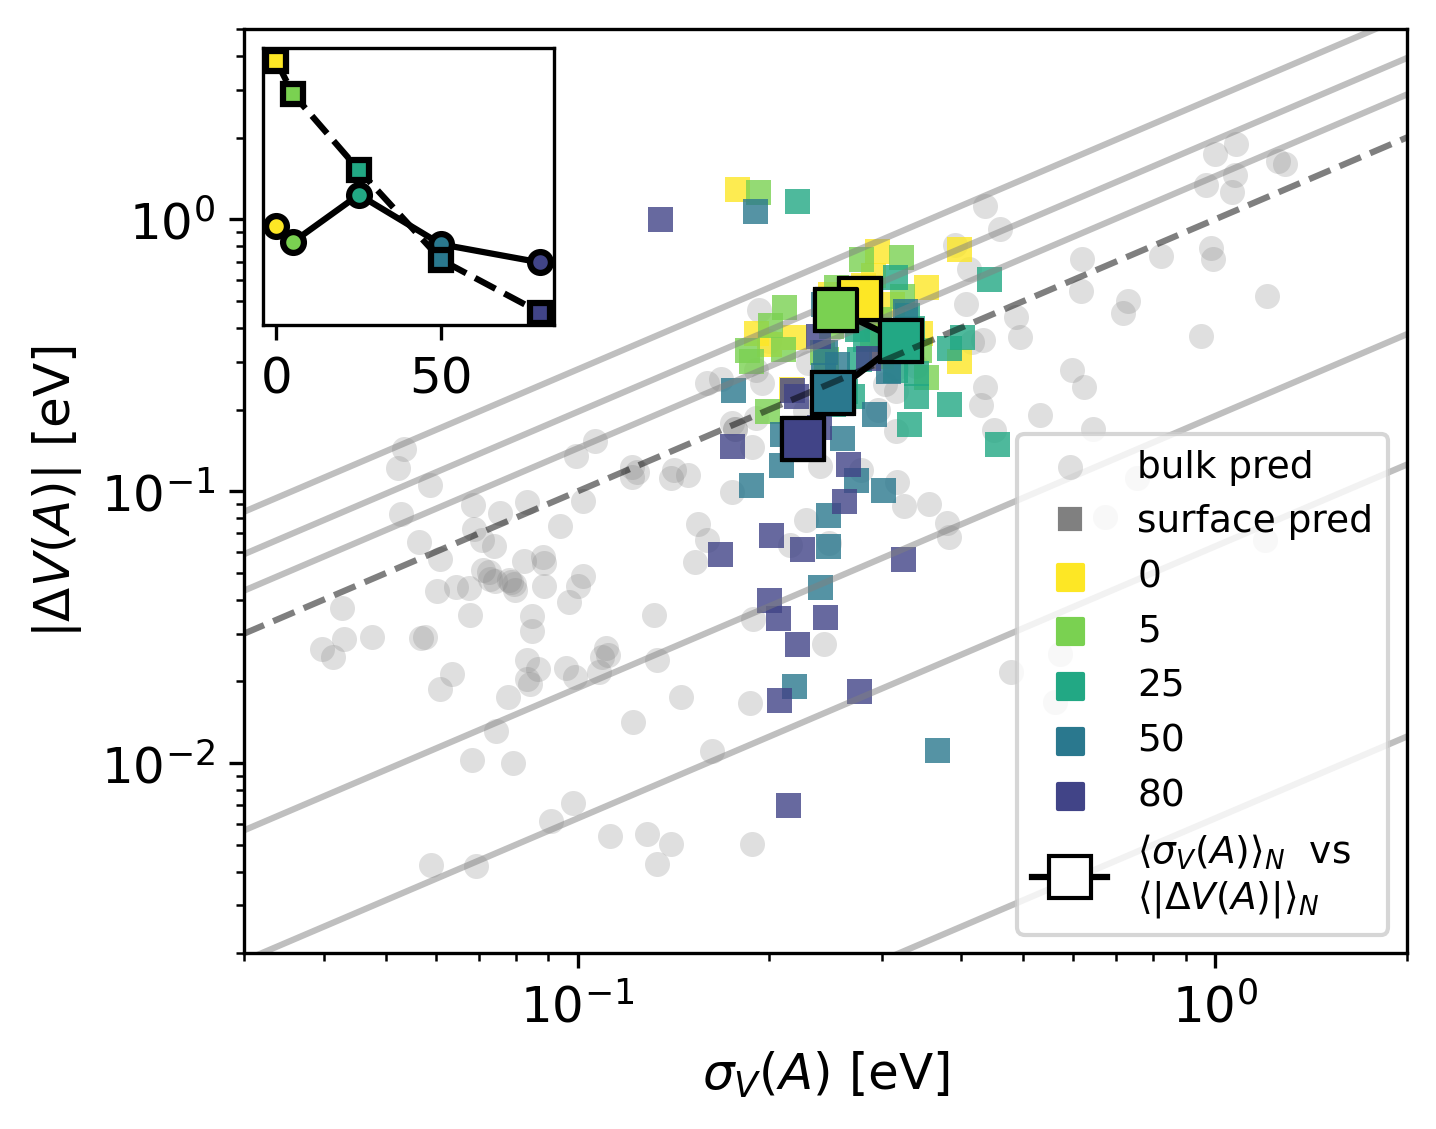

In [154]:
ALPHA_SURF = 0.8
NLAST = 20

rmses = []

for i in range(len(z_surface)):
    rmse = np.sqrt(np.mean(z_surface[i][-NLAST:]**2))
    rmses.append(rmse)

fig, ax = plt.subplots(figsize=(5,4), dpi=300)

LINESTYLE_UNIT = "--"
COLOR_UNIT = "black"
SCATTER_SIZE = 30.
OPACITY_SCATTER = 0.8

plt.rc('axes', labelsize=13.5)
plt.rcParams.update({'font.size': 9.0})
matplotlib.rc('xtick', labelsize=12.0) 
matplotlib.rc('ytick', labelsize=12.0) 
plt.rc('axes', labelsize=12.)


mean_uq = [np.mean(np.sqrt(surface_pred_energy_vars[v_i][-NLAST:]*alphas_2[v_i])) for v_i in range(len(surface_pred_energy_vars))]
mean_z = [np.mean(z_surface[v_i][-NLAST:]) for v_i in range(len(z_surface))]

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(1., 0.2, 5))

plt.scatter(np.sqrt(test_pred_energy_vars[0]*alphas_2[0]),z_test[0],color="grey", alpha=0.25, linewidths=0, rasterized=True, label="bulk pred")
plt.plot([],[], "s", linestyle="", markersize=5, color="grey", linewidth=0., label="surface pred")



ax.plot(x, quantiles_upper_05, color='gray', alpha=0.5)
ax.plot(x, quantiles_lower_05, color='gray', alpha=0.5)
ax.plot(x, quantiles_upper_01, color='gray', alpha=0.5)
ax.plot(x, quantiles_lower_01, color='gray', alpha=0.5)
ax.plot(x, quantiles_upper_005, color='gray', alpha=0.5)
ax.plot(x, quantiles_lower_005, color='gray', alpha=0.5)
ax.scatter(np.sqrt(surface_pred_energy_vars[0][-NLAST:]*alphas_2[0]),z_surface[0][-NLAST:], marker="s", color=colors[0], alpha=ALPHA_SURF, linewidths=0, rasterized=True)
ax.scatter(np.sqrt(surface_pred_energy_vars[1][-NLAST:]*alphas_2[1]),z_surface[1][-NLAST:], marker="s",  color=colors[1], alpha=ALPHA_SURF, linewidths=0, rasterized=True)
ax.scatter(np.sqrt(surface_pred_energy_vars[2][-NLAST:]*alphas_2[2]),z_surface[2][-NLAST:], marker="s", color=colors[2], alpha=ALPHA_SURF, linewidths=0, rasterized=True)
ax.scatter(np.sqrt(surface_pred_energy_vars[3][-NLAST:]*alphas_2[3]),z_surface[3][-NLAST:], marker="s",  color=colors[3], alpha=ALPHA_SURF, linewidths=0, rasterized=True)
ax.scatter(np.sqrt(surface_pred_energy_vars[4][-NLAST:]*alphas_2[4]),z_surface[4][-NLAST:], marker="s",  color=colors[4], alpha=ALPHA_SURF, linewidths=0, rasterized=True)

sizes = [0, 5,25,50,80]

ax.scatter([],[],color=colors[0], marker='s', label="{}".format(sizes[0]))
ax.scatter([],[],color=colors[1], marker='s', label="{}".format(sizes[1]))
ax.scatter([],[],color=colors[2], marker='s', label="{}".format(sizes[2]))
ax.scatter([],[],color=colors[3], marker='s', label="{}".format(sizes[3]))
ax.scatter([],[],color=colors[4], marker='s', label="{}".format(sizes[4]))

ax.plot(mean_uq[:],mean_z[:],
            's', linestyle="-",  markersize=10, markeredgecolor='black',markerfacecolor="white", color="black", label=r"$\langle\sigma_{V}(A)\rangle_{N}$  vs " + "\n" + r"$\langle|\Delta V(A)|\rangle_{N}$")

handles = []

for i in range(5):
    ax.scatter(mean_uq[i],
                   mean_z[i],marker='s',
                     s=100, edgecolors='black',c=colors[i], zorder=2)

ax.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
#plt.scatter()
#plt.scatter(np.sqrt(surface_pred_energy_vars[4][-20:]*alphas_2[4]),z_surface[4][-20:],color=colors[4], alpha=ALPHA_SURF, linewidths=0)
#plt.scatter(np.sqrt(test_pred_energy_vars[3]*alphas_2[3]),z_test[3],color="grey", alpha=0.25, linewidths=0, rasterized=True, label="80 - bulk pred")


ax.loglog()
ax.set_xlim(3e-2, 2e0)
ax.set_ylim(2e-3, 5e0)
ax.set_xlabel(r"$\sigma_{V}(A)$ [eV]")
ax.set_ylabel(r"$|\Delta V(A)|$ [eV]")
ax.legend()

axins = inset_axes(ax, width="25%", height="30%", loc='upper left')
axins.plot(sizes, mean_uq,linestyle="-", color="black",)
axins.plot(sizes, mean_z,linestyle="--", color="black",)




MARKERSIZE = 5


#axins.set_ylabel("[eV]")
#axins.set_xlabel(r"N$_{\text{add}}$")
axins.plot([],[],marker='s', color="black", linestyle=" ", markersize=MARKERSIZE, markerfacecolor="white", markeredgewidth=1.5, markeredgecolor='black', label=r"$\langle|\Delta V(A)|\rangle_{N}$")
axins.plot([],[],marker='o', color="black", linestyle=" ", markersize=MARKERSIZE, markerfacecolor="white", markeredgewidth=1.5, markeredgecolor='black', label=r"$\langle\sigma_{V}(A)\rangle_{N}$")
#axins.legend(loc="upper right", fontsize=9)

# Plot each point with the color array and black border on the inset
for i in range(len(sizes)):
    axins.plot(sizes[i], mean_uq[i], marker="o", markersize=MARKERSIZE, linestyle="-", color="black", markerfacecolor=colors[i], markeredgewidth=1.5, markeredgecolor='black')
    axins.plot(sizes[i], mean_z[i], marker="s", markersize=MARKERSIZE, linestyle="-", color="black", markerfacecolor=colors[i], markeredgewidth=1.5, markeredgecolor='black')
# Setting the appearance of the inset plot
#axins.set_xticks([])
axins.set_yticks([])


#plt.savefig("active-learning-surfaces.pdf", dpi=300, bbox_inches="tight")
#plt.legend(title="Surface pred. with N surface\ntraining structures added",loc="lower right", ncols=2)#title="N train surfaces added",

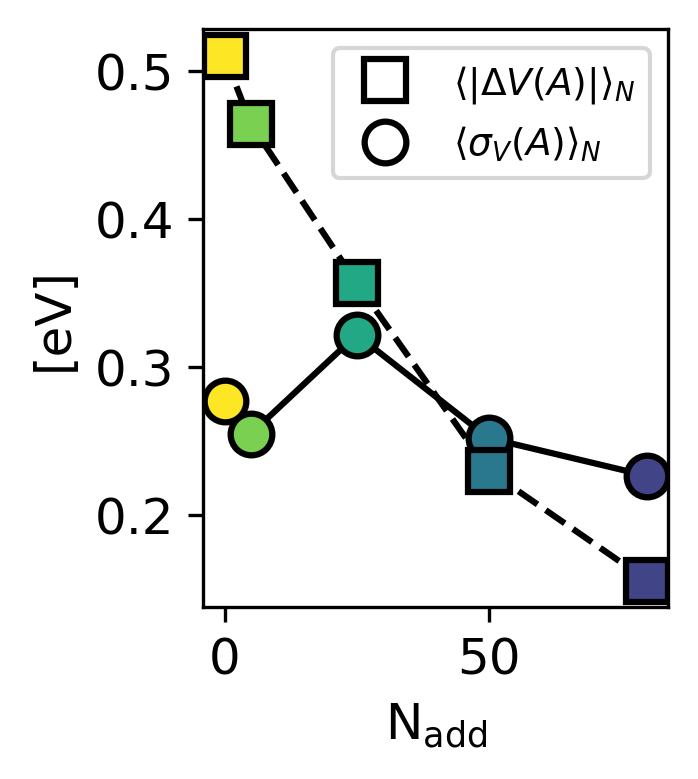

In [138]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(1., 0.2, 5))
MARKERSIZE = 10

plt.figure(figsize=(2,2.5), dpi=300)
plt.plot(sizes, mean_uq,linestyle="-", color="black",)
plt.plot(sizes, mean_z,linestyle="--", color="black",)
plt.ylabel("[eV]")
plt.xlabel(r"N$_{\text{add}}$")
plt.plot([],[],marker='s', color="black", linestyle=" ", markersize=MARKERSIZE, markerfacecolor="white", markeredgewidth=1.5, markeredgecolor='black', label=r"$\langle|\Delta V(A)|\rangle_{N}$")
plt.plot([],[],marker='o', color="black", linestyle=" ", markersize=MARKERSIZE, markerfacecolor="white", markeredgewidth=1.5, markeredgecolor='black', label=r"$\langle\sigma_{V}(A)\rangle_{N}$")
plt.legend(loc="upper right", fontsize=9)


for i in range(len(sizes)):
    plt.plot(sizes[i], mean_uq[i], marker="o", markersize=MARKERSIZE, linestyle="-", color="black", markerfacecolor=colors[i], markeredgewidth=1.5, markeredgecolor='black', label="RMSE" if i == 0 else "")
    plt.plot(sizes[i], mean_z[i], marker="s", markersize=MARKERSIZE, linestyle="-", color="black", markerfacecolor=colors[i], markeredgewidth=1.5, markeredgecolor='black', label="Mean Z" if i == 0 else "")


In [64]:
colors = cmap(np.linspace(1., 0.2, 6))

In [65]:
colors

array([[0.993248, 0.906157, 0.143936, 1.      ],
       [0.585678, 0.846661, 0.249897, 1.      ],
       [0.232815, 0.732247, 0.459277, 1.      ],
       [0.122606, 0.585371, 0.546557, 1.      ],
       [0.179019, 0.433756, 0.55743 , 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ]])

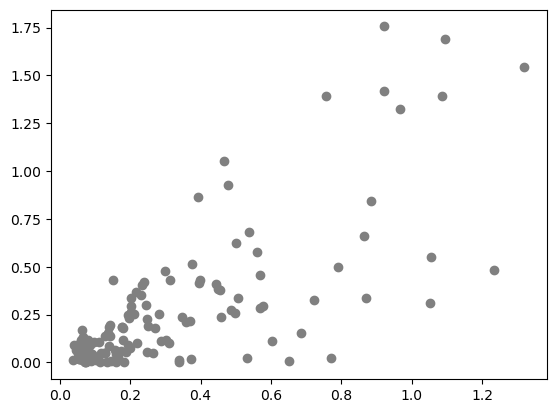

In [28]:
plt.scatter(np.sqrt(test_pred_energy_vars[3]*alphas_2[3]),z_test[3],color="grey")

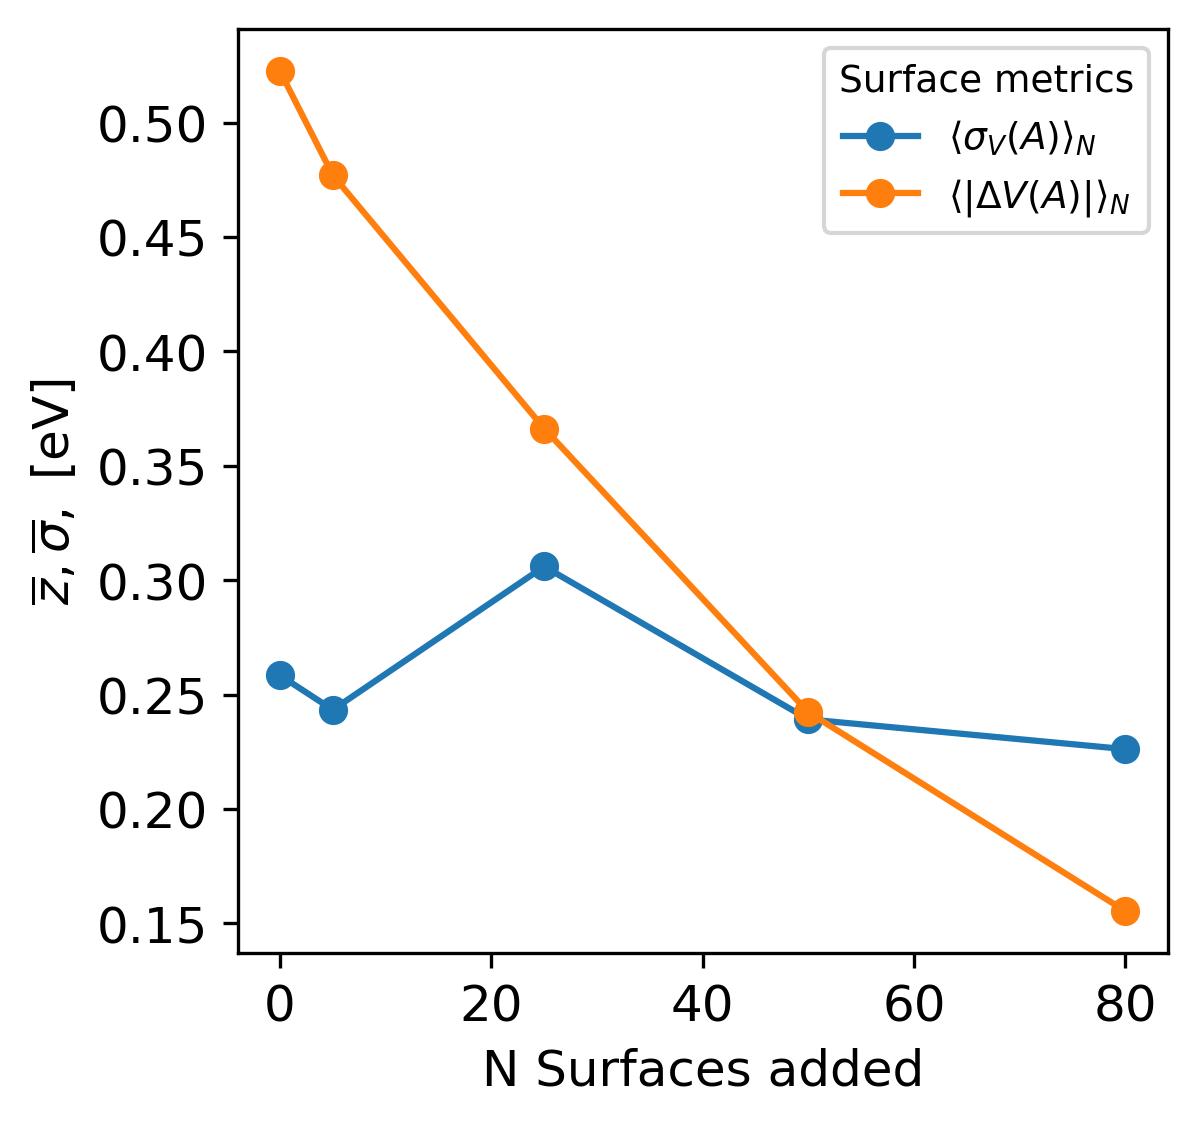

In [9]:
plt.figure(figsize=(4,4), dpi=300)
plt.plot([0,5,25,50, 80], mean_sigma, marker="o", label=r"$\langle \sigma_V(A) \rangle_N$")
plt.plot([0,5,25,50, 80], mean_z, marker="o", label=r"$\langle | \Delta V(A)|  \rangle_N$")
plt.xlabel(r"N Surfaces added")
plt.ylabel(r"$\overline{z},\overline{\sigma},$ [eV]")
plt.legend(title="Surface metrics")

In [22]:
np.argmax(z_surface)

15

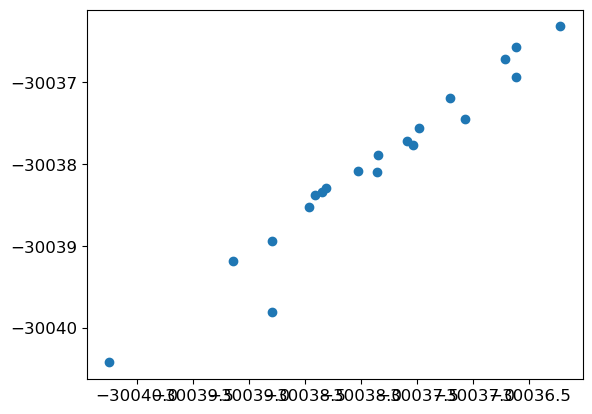

In [18]:
plt.scatter(surface_energy,surface_pred_energy)